# Project-b, Task 1
## Given a RGB.fits file, create a Python script which will separate individual Red, Green, and Blue filters.

### Participant: MD Fardin Islam, www.mdfardin.xyz/author

### Mentor: Tanmoy Bhowmik


---



#Main Framework

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Filename: /content/drive/MyDrive/camsustastro/RGBimage1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU        35   (3600, 3000)   int16 (rescales to uint16)   
  2                1 ImageHDU        35   (3600, 3000)   int16 (rescales to uint16)   
  3                1 ImageHDU        35   (3600, 3000)   int16 (rescales to uint16)   
Red channel - Min: 0 Max: 65535
Green channel - Min: 0 Max: 65535
Blue channel - Min: 0 Max: 65535


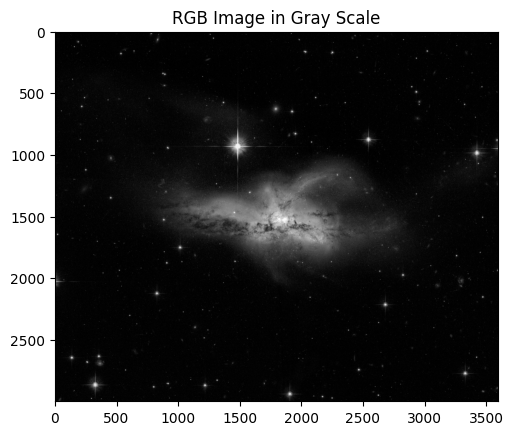

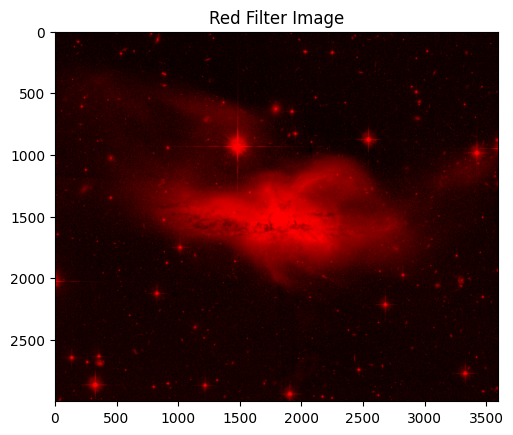

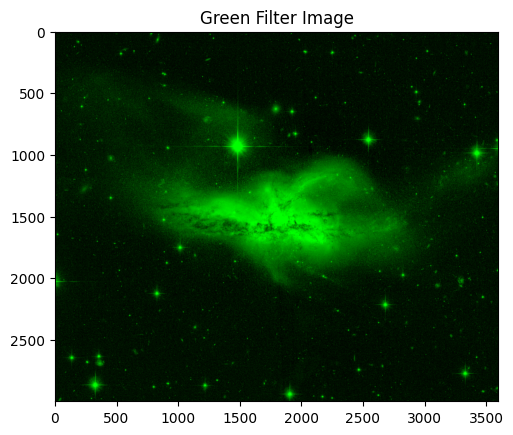

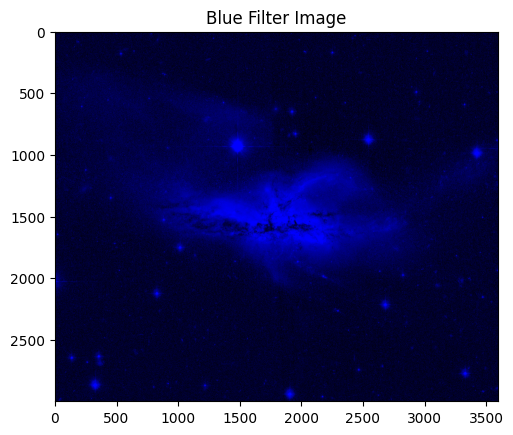

In [ ]:
from astropy.io import fits
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
import numpy as np

#Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Loading fits file from Drive
file_path = '/content/drive/MyDrive/camsustastro/RGBimage1.fits'
hdu = fits.open(file_path)
hdu.info()

#Reading data
red_channel = hdu[1].data
green_channel = hdu[2].data
blue_channel = hdu[3].data

#Normalizing image
norm_red = simple_norm(red_channel, 'sqrt', percent=99.5)
norm_green = simple_norm(green_channel, 'sqrt', percent=99.5)
norm_blue = simple_norm(blue_channel, 'sqrt', percent=99.5)

red_channel_norm = norm_red(red_channel)
green_channel_norm = norm_green(green_channel)
blue_channel_norm = norm_blue(blue_channel)

# Preparation for making individual filer arrays
red_filter_image = np.zeros((red_channel.shape[0], red_channel.shape[1], 3), dtype=float)
green_filter_image = np.zeros((green_channel.shape[0], green_channel.shape[1], 3), dtype=float)
blue_filter_image = np.zeros((blue_channel.shape[0], blue_channel.shape[1], 3), dtype=float)

# Assigning normalized values to the respective channels
red_filter_image[:, :, 0] = red_channel_norm  # Red channel to R
green_filter_image[:, :, 1] = green_channel_norm  # Green channel to G
blue_filter_image[:, :, 2] = blue_channel_norm  # Blue channel to B

# Saving normalized images to Google Drive

# Red Filter Image
hdu_red = fits.PrimaryHDU(red_filter_image)
hdul_red = fits.HDUList([hdu_red])
hdul_red.writeto('/content/drive/MyDrive/camsustastro/red_filter.fits', overwrite=True)

# Green Filter Image
hdu_green = fits.PrimaryHDU(green_filter_image)
hdul_green = fits.HDUList([hdu_green])
hdul_green.writeto('/content/drive/MyDrive/camsustastro/green_filter.fits', overwrite=True)

# Blue Filter Image
hdu_blue = fits.PrimaryHDU(blue_filter_image)
hdul_blue = fits.HDUList([hdu_blue])
hdul_blue.writeto('/content/drive/MyDrive/camsustastro/blue_filter.fits', overwrite=True)

# Checking the min/max values
print("Red channel - Min:", red_channel.min(), "Max:", red_channel.max())
print("Green channel - Min:", green_channel.min(), "Max:", green_channel.max())
print("Blue channel - Min:", blue_channel.min(), "Max:", blue_channel.max())

# Displaying the images

#RGB Image
rgb_hdu = fits.open('/content/drive/MyDrive/camsustastro/RGBimage1.fits')
rgb_image = rgb_hdu[1].data

plt.figure()
plt.imshow(rgb_image, cmap='gray')
plt.title('RGB Image in Gray Scale')
plt.show()

#Red Filtered Image
plt.figure()
plt.imshow(red_filter_image)
plt.title('Red Filter Image')
plt.show()

#Green Filtered Image
plt.figure()
plt.imshow(green_filter_image)
plt.title('Green Filter Image')
plt.show()

#Blue Filtered Image
plt.figure()
plt.imshow(blue_filter_image)
plt.title('Blue Filter Image')
plt.show()
